In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/train.csv")
data = data.drop(['Id'],axis = 1)
data.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
features = data.drop(['Cover_Type'],axis = 1)
features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels = data['Cover_Type']
labels_categorical = pd.get_dummies(labels)
labels_categorical.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [7]:
features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
features_null = pd.DataFrame(features.isnull().sum(), columns = ['count'])
features_null = features_null.sort_values('count', ascending=False)

In [9]:
features_null

,count
Elevation,0
Soil_Type27,0
Soil_Type16,0
Soil_Type17,0
Soil_Type18,0
Soil_Type19,0
Soil_Type20,0
Soil_Type21,0
Soil_Type22,0
Soil_Type23,0


In [10]:
df_corr = features.corrwith(labels).abs().sort_values(ascending=False)
df_corr

Soil_Type38                           0.257810
Soil_Type39                           0.240384
Wilderness_Area1                      0.230117
Soil_Type29                           0.218564
Soil_Type40                           0.205851
Soil_Type22                           0.195993
Soil_Type23                           0.158762
Soil_Type32                           0.132312
Soil_Type12                           0.129985
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Horizontal_Distance_To_Roadways       0.105662
Soil_Type24                           0.100797
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Soil_Type31                           0.079882
Soil_Type33                           0.078955
Wilderness_Area4                      0.075774
Vertical_Distance_To_Hydrology        0.075647
Soil_Type37  

In [13]:
print(features.shape)
features = features.drop(['Soil_Type7','Soil_Type15'],axis=1)
print(features.shape)

(15120, 54)
(15120, 52)


In [14]:
features.columns

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type8', u'Soil_Type9',
       u'Soil_Type10', u'Soil_Type11', u'Soil_Type12', u'Soil_Type13',
       u'Soil_Type14', u'Soil_Type16', u'Soil_Type17', u'Soil_Type18',
       u'Soil_Type19', u'Soil_Type20', u'Soil_Type21', u'Soil_Type22',
       u'Soil_Type23', u'Soil_Type24', u'Soil_Type25', u'Soil_Type26',
       u'Soil_Type27', u'Soil_Type28', u'Soil_Type29', u'Soil_Type30',
       u'Soil_Type31', u'Soil_Type32', u'Soil_Type33', u'Soil_Type34',
       u'Soil_Type35', u'Soil_Type36', u'Soil_Type37', u'Soil_Type38',
       u'Soil

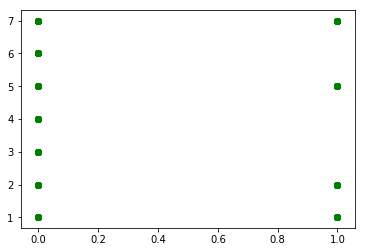